In [1]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x, **kwargs):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x, **kwargs):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)

In [2]:
# Parameters
d = 1
k = 2
delta = 0.3
N = 101

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)

# Integration
integrator = rad.integrate.MeanIntegrator(ranges, 1000)
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Solve for approximate solution
phi = rad.Wendland(d, k, delta, xc)
solver = rad.solve.GalerkinSolver(phi, integrator, 'helmholtz')
approx = solver.solve(f)
error = rad.error(exact, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

L2 Relative Error: 0.07986589126513904
Condition Number: 484865895787.63416


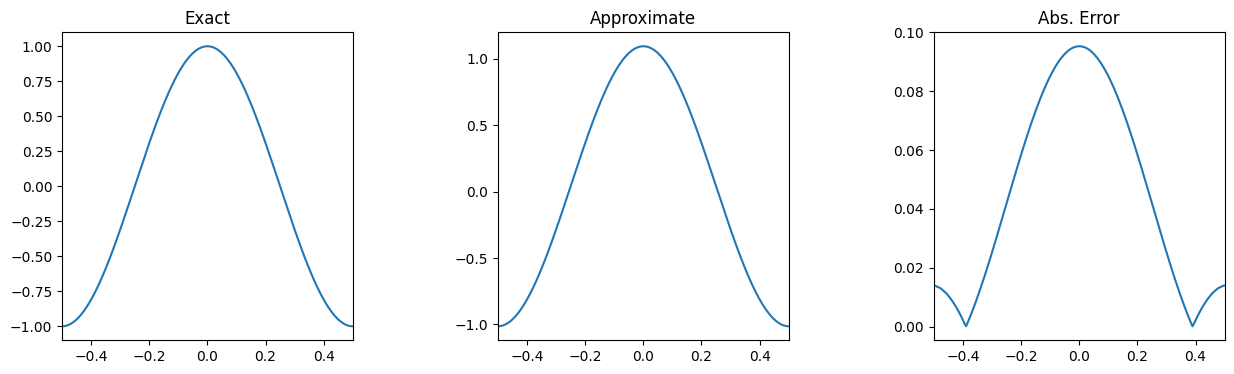

In [3]:
rad.plot.spread(
    ranges,
    exact,
    approx,
    lambda *x: np.abs(exact(*x) - approx(*x )),
    n=200,
    wspace=0.5,
    hspace=0.5,
    titles=["Exact", "Approximate", "Abs. Error"],
    figsize=(15, 4)
)